<a href="https://colab.research.google.com/github/kkipngenokoech/DA-course/blob/main/Lecture_6_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xarray

In [2]:
# Imports

import xarray as xr
from pathlib import Path
import glob
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from datetime import datetime, timedelta

In [3]:
# Download the data from Github


base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/"

all_data = []
start_date = datetime(2020, 4, 12)

# We're getting 1 year of data
end_date = datetime(2021,4, 12) # but can get data up until March 9th, 2023,


current = start_date
while current <= end_date:
    date_str = current.strftime("%m-%d-%Y") + ".csv"
    try:
        df_temp = pd.read_csv(base_url + date_str)
        all_data.append(df_temp)
    except:
        pass
    current += timedelta(days=1)

df = pd.concat(all_data, ignore_index=True)


In [4]:
def add_region_and_filter(df):
    """Add region column and filter to 50 states + DC only."""

    regions = {
        'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire',
                      'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania'],
        'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin',
                    'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska',
                    'North Dakota', 'South Dakota'],
        'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina',
                  'South Carolina', 'Virginia', 'West Virginia', 'District of Columbia',
                  'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
                  'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
        'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico',
                 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    }

    state_to_region = {state: region for region, states in regions.items() for state in states}
    df_clean = df[df['Province_State'].isin(state_to_region.keys())].copy()
    df_clean['Region'] = df_clean['Province_State'].map(state_to_region)

    return df_clean

# Apply it
df_clean = add_region_and_filter(df)

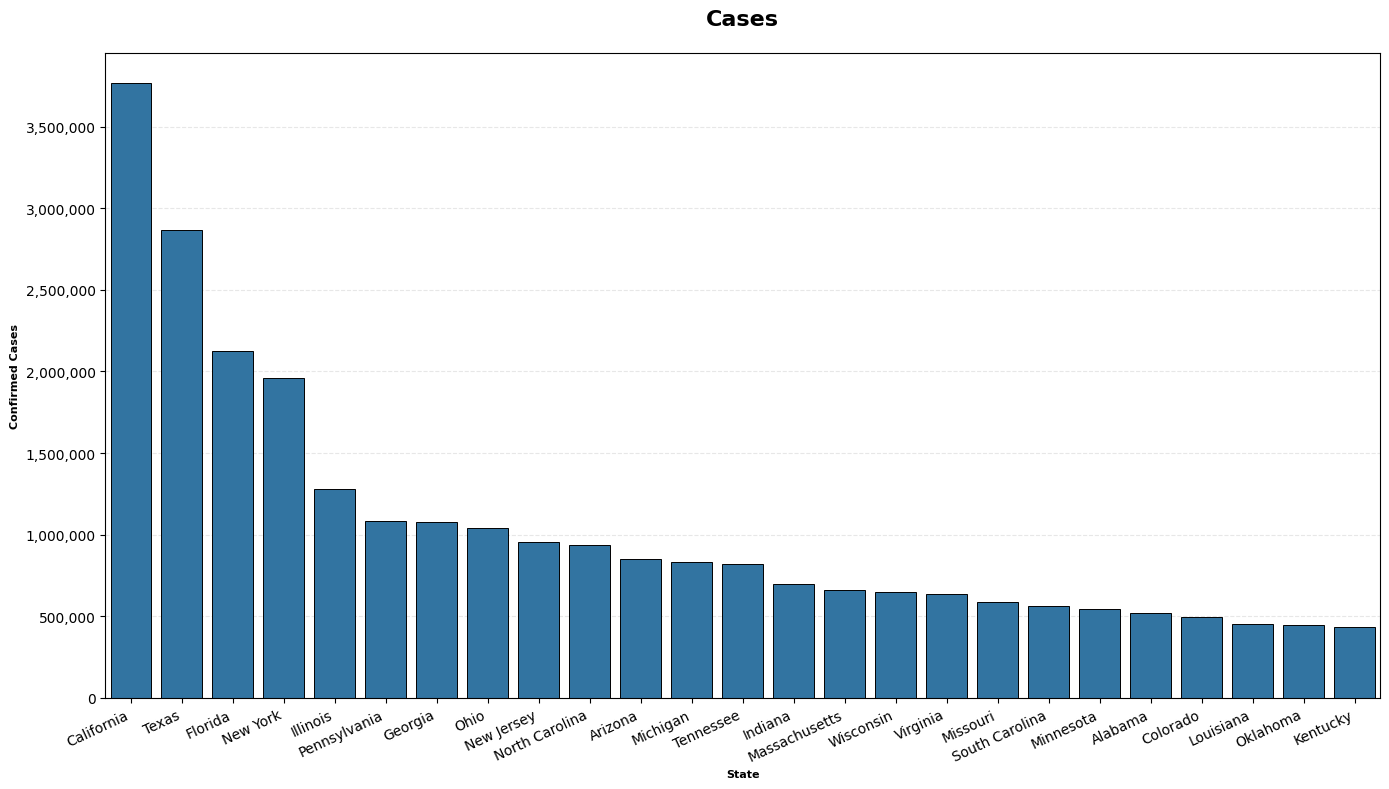

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the most recent data for each state
df_latest = df.groupby('Province_State').last().reset_index()
df_topn = df_latest.nlargest(25, 'Confirmed').sort_values('Confirmed', ascending=False)

# Create figure
fig, ax = plt.subplots(figsize=(14, 8))

# Create barplot with seaborn
sns.barplot(data=df_topn,
            x='Province_State',
            y='Confirmed',
            ax=ax,
            edgecolor='black',
            linewidth=0.7)


# Formatting
ax.set_ylabel('Confirmed Cases', fontsize=8, fontweight='bold')
ax.set_xlabel('State', fontsize=8, fontweight='bold')
ax.set_title('Cases',
             fontsize=16,
             fontweight='bold',
             pad=20)

plt.xticks(rotation=25, ha='right')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

In [6]:
!pip install plotly nbformat

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import geopandas as gpd

# Load US states shapefile
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)

# Prepare COVID data
df_map = df_latest[df_latest['Province_State'].isin(us_states['name'].values)].copy()

# Merge with geodata
us_map = us_states.merge(df_map, left_on='name', right_on='Province_State', how='left')

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot choropleth
us_map.plot(
    column='Confirmed',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Confirmed Cases',
        'orientation': 'horizontal',
        'shrink': 0.6,
        'pad': 0.05,
        'format': lambda x, p: f'{int(x):,}'
    },
    cmap='Reds',
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)

# Add state labels for top 10 states
top_states = df_map.nlargest(10, 'Confirmed')['Province_State'].values
for idx, row in us_map.iterrows():
    if row['name'] in top_states:
        centroid = row['geometry'].centroid
        ax.annotate(
            row['name'][:2].upper(),
            xy=(centroid.x, centroid.y),
            ha='center', va='center',
            fontsize=7, fontweight='bold',
            color='white',
            path_effects=[pe.withStroke(linewidth=2, foreground='black')]
        )

# Formatting
ax.set_title('COVID-19 Confirmed Cases by State', fontsize=18, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

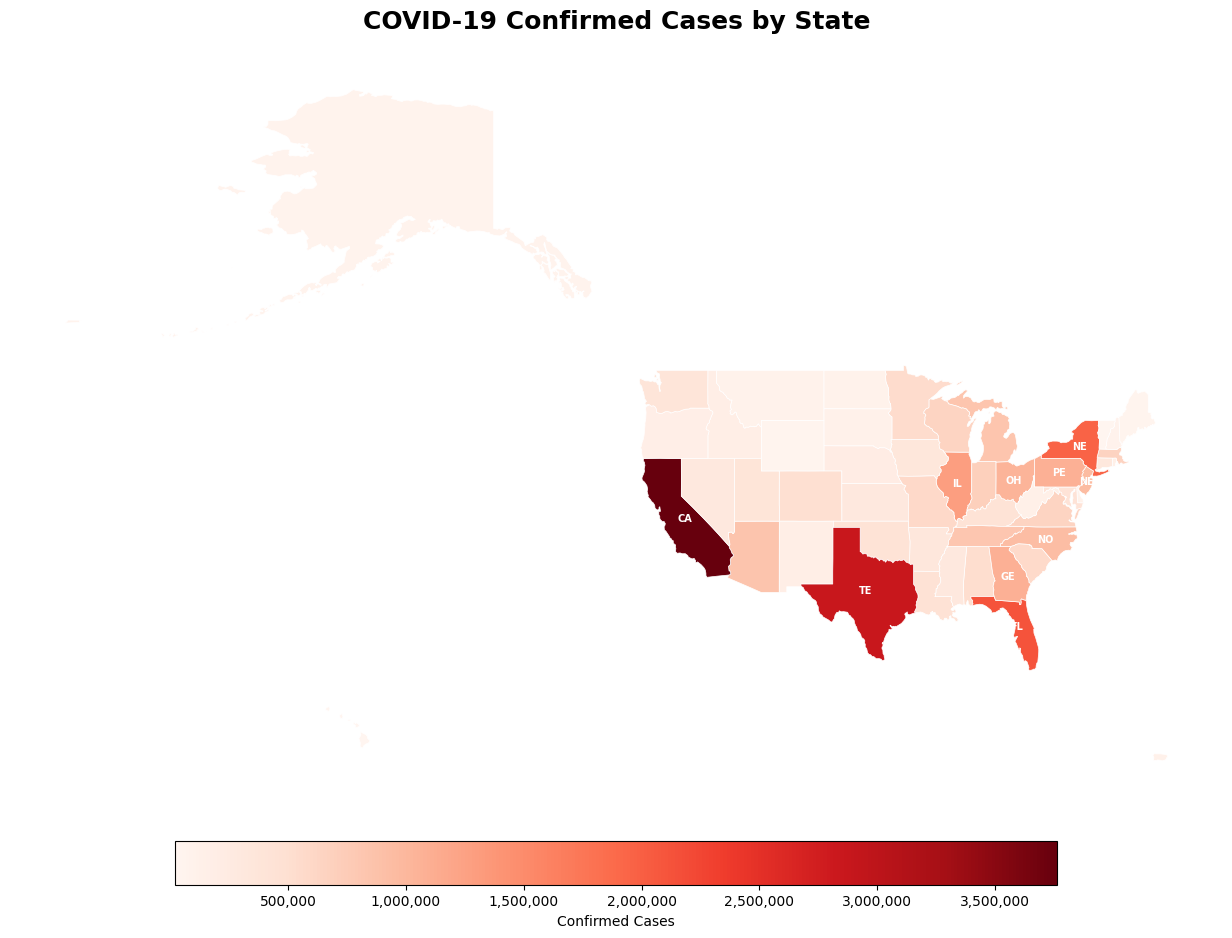

In [16]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Load US states shapefile
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)

# Prepare COVID data
df_map = df_latest[df_latest['Province_State'].isin(us_states['name'].values)].copy()

# Merge with geodata
us_map = us_states.merge(df_map, left_on='name', right_on='Province_State', how='left')

# Create figure
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot choropleth
us_map.plot(
    column='Confirmed',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': 'Confirmed Cases',
        'orientation': 'horizontal',
        'shrink': 0.6,
        'pad': 0.05,
        'format': lambda x, p: f'{int(x):,}'
    },
    cmap='Reds',
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)

# Add state labels for top 10 states
top_states = df_map.nlargest(10, 'Confirmed')['Province_State'].values
for idx, row in us_map.iterrows():
    if row['name'] in top_states:
        centroid = row['geometry'].centroid
        ax.annotate(
            row['name'][:2].upper(),  # State abbreviation
            xy=(centroid.x, centroid.y),
            ha='center', va='center',
            fontsize=7, fontweight='bold',
            color='white',
            # path_effects=[plt.matplotlib.patheffects.withStroke(linewidth=2, foreground='black')]
        )

# Formatting
ax.set_title('COVID-19 Confirmed Cases by State', fontsize=18, fontweight='bold', pad=20)
ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

## Bump Chart: State Rankings Over Time

A bump chart shows how rankings change over time - which states rose or fell in COVID case counts.

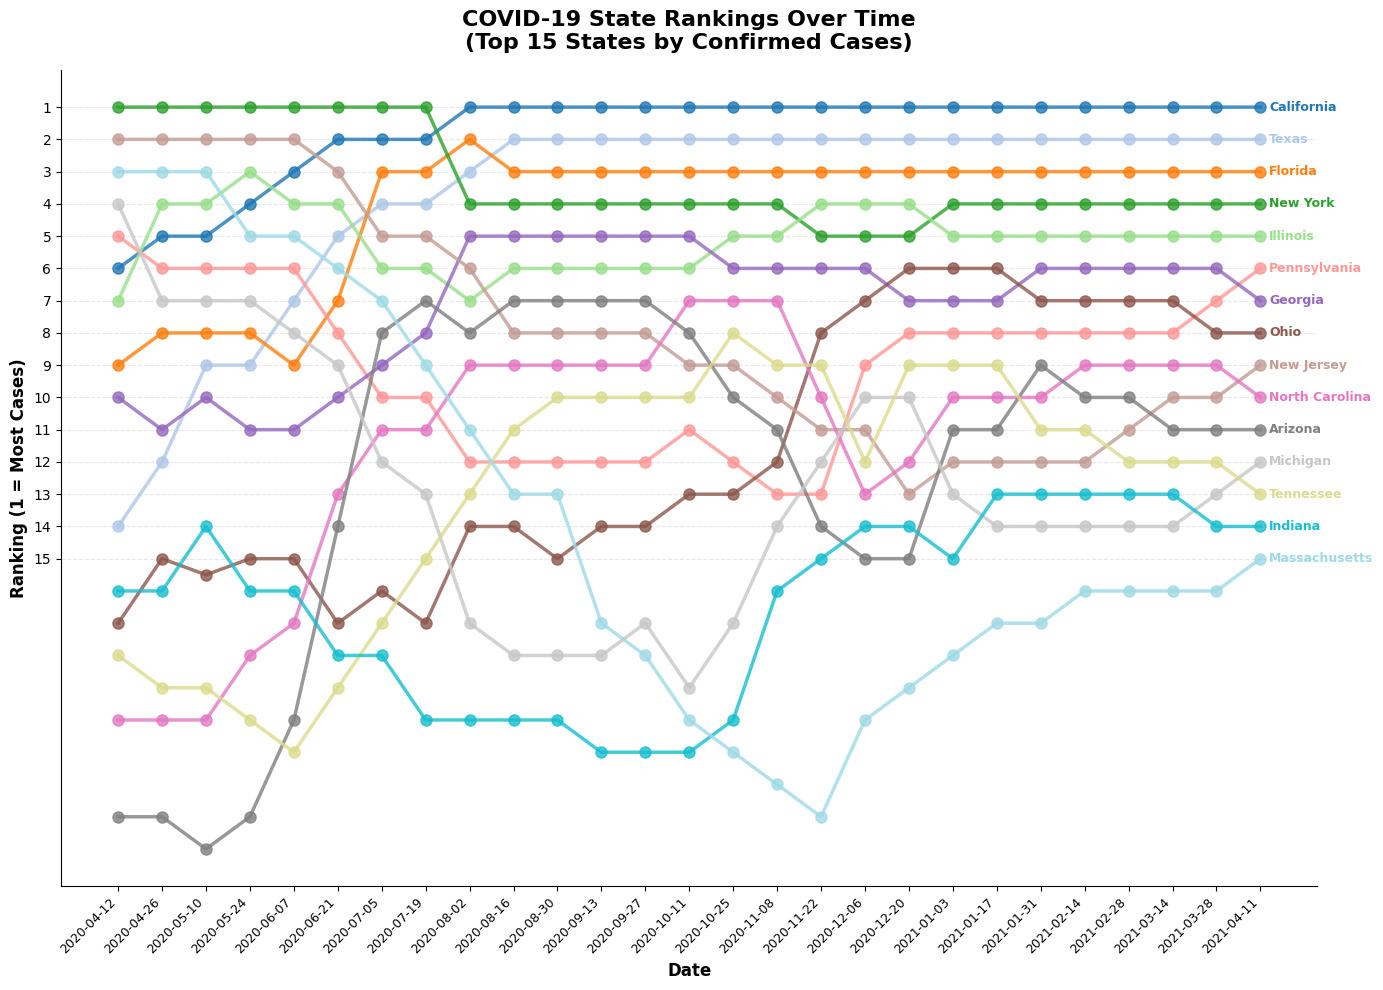

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pivot data: states as columns, dates as rows
df_pivot = df_clean.pivot_table(values='Confirmed', 
                                 index='Date', 
                                 columns='Province_State')

# Calculate rankings (1 = most cases)
df_ranks = df_pivot.rank(axis=1, ascending=False)

# Get top 15 states (by final ranking)
top_states = df_ranks.iloc[-1].nsmallest(15).index.tolist()
df_ranks_top = df_ranks[top_states]

# Sample dates for cleaner visualization (every 14 days)
dates = df_ranks_top.index.unique()[::14]
df_ranks_sampled = df_ranks_top.loc[dates]

# Create figure
fig, ax = plt.subplots(figsize=(14, 10))

# Color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(top_states)))

# Plot each state's ranking journey
for i, state in enumerate(top_states):
    y = df_ranks_sampled[state].values
    x = range(len(dates))
    
    ax.plot(x, y, marker='o', markersize=8, linewidth=2.5, 
            color=colors[i], label=state, alpha=0.8)
    
    # Add state label at the end
    ax.annotate(state, xy=(x[-1] + 0.2, y[-1]), va='center', 
                fontsize=9, fontweight='bold', color=colors[i])

# Invert y-axis (rank 1 at top)
ax.invert_yaxis()

# X-axis: show dates
ax.set_xticks(range(len(dates)))
ax.set_xticklabels([str(d)[:10] for d in dates], rotation=45, ha='right', fontsize=9)

# Y-axis: rankings
ax.set_yticks(range(1, 16))
ax.set_ylabel('Ranking (1 = Most Cases)', fontsize=12, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, fontweight='bold')

# Title
ax.set_title('COVID-19 State Rankings Over Time\n(Top 15 States by Confirmed Cases)', 
             fontsize=16, fontweight='bold', pad=15)

# Grid
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Remove top/right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Mapping the Spread of COVID-19

In [9]:
# Show geographically how COVID-19 had spread in a year

Geopandas Information: https://geopandas.org/en/stable/getting_started/introduction.html

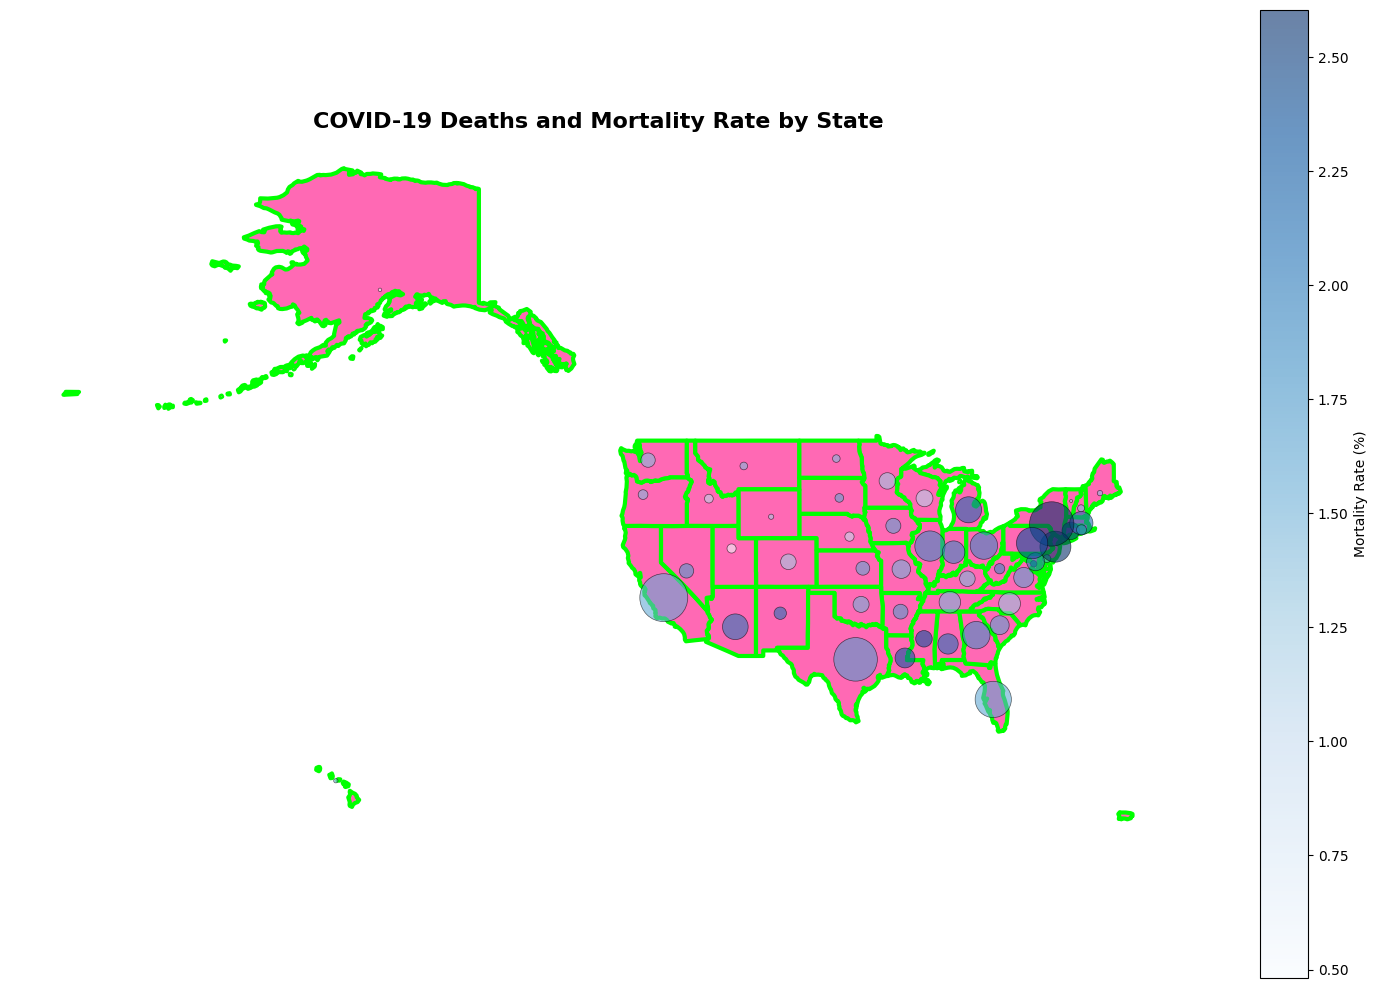

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd


# Load US states map
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)

# Get latest COVID data
df_latest = df_clean.groupby('Province_State').last().reset_index()
df_latest['Mortality_Rate'] = (df_latest['Deaths'] / df_latest['Confirmed'] * 100)

# Create plot
fig, ax = plt.subplots(figsize=(15, 10))

# Draw the US map
us_states.plot(ax=ax, color='hotpink', edgecolor='lime', linewidth=3)

# Add COVID data as dots
scatter = ax.scatter(df_latest['Long_'],
                    df_latest['Lat'],
                    s=df_latest['Deaths'] / 50,
                    c=df_latest['Mortality_Rate'],
                    cmap='Blues',
                    alpha=0.6,
                    edgecolors='black',
                    linewidth=0.5)

# Colorbar
plt.colorbar(scatter, ax=ax, label='Mortality Rate (%)')

# Formatting
ax.set_title('COVID-19 Deaths and Mortality Rate by State', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

# Generate a GIF

Read more details about Animations in Matplotlb here: https://matplotlib.org/stable/users/explain/animations/animations.html

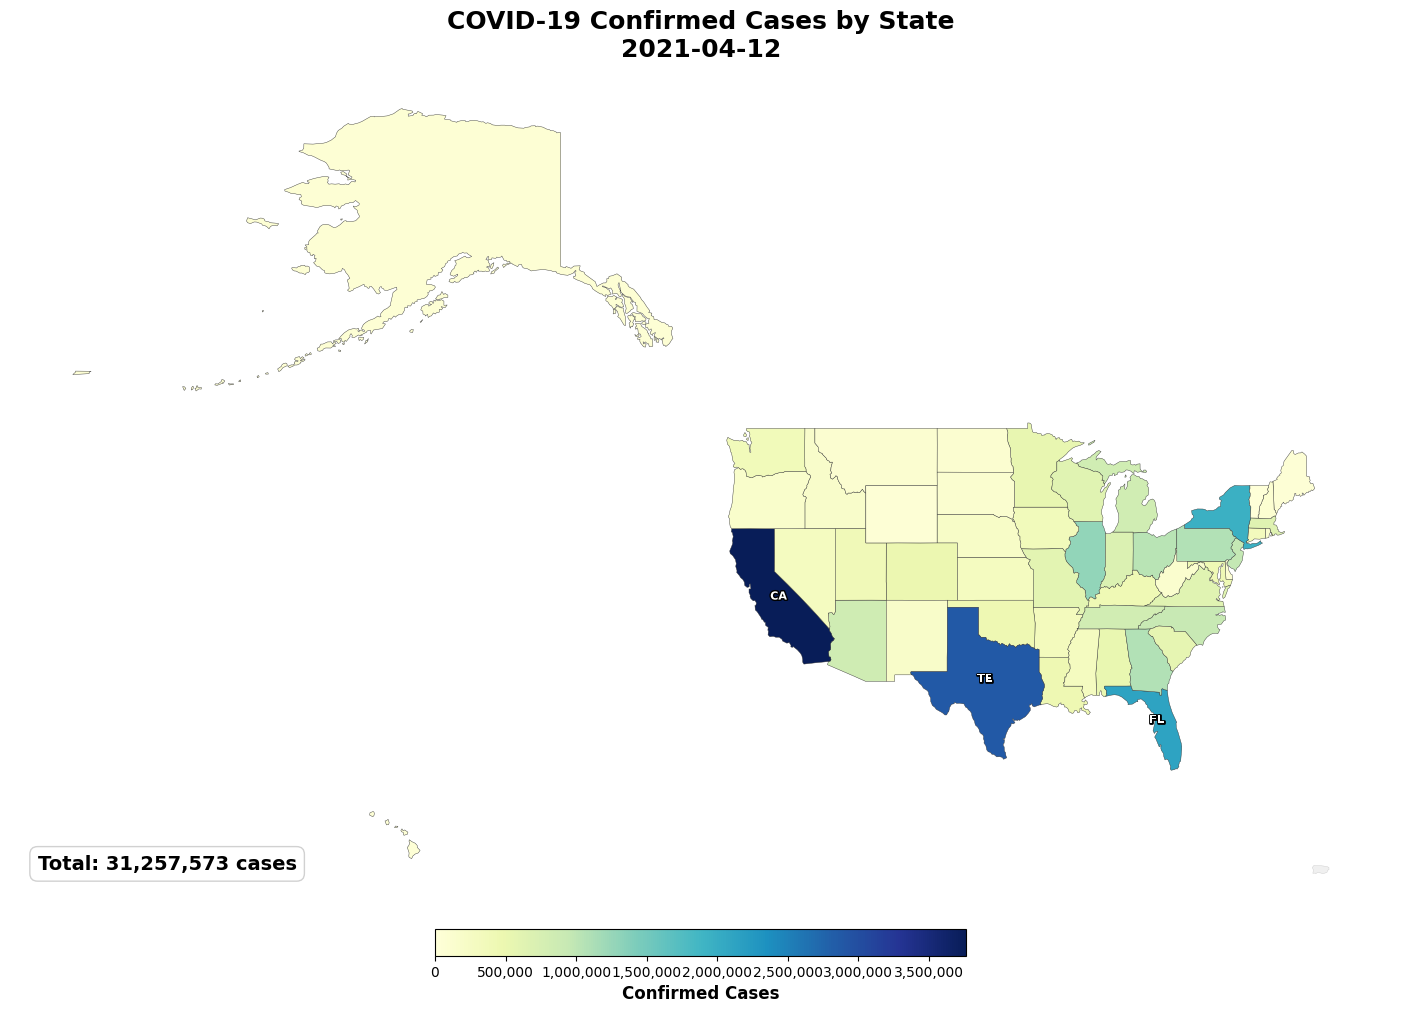


Using colormap: YlGnBu
Change CMAP variable to try: 'viridis', 'plasma', 'YlGnBu', 'PuBu', 'cividis', 'inferno'


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import geopandas as gpd
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# Load US states map ONCE
url = 'https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json'
us_states = gpd.read_file(url)

# Pre-calculate values for consistent scaling
df_clean['Mortality_Rate'] = (df_clean['Deaths'] / df_clean['Confirmed'] * 100).fillna(0)
max_confirmed = df_clean['Confirmed'].max()

# === COLOR SCHEME OPTIONS (uncomment your preferred choice) ===
# CMAP = 'viridis'      # Perceptually uniform, colorblind-friendly, modern
# CMAP = 'plasma'       # Warm tones, perceptually uniform
CMAP = 'YlGnBu'         # Yellow-Green-Blue, neutral & professional
# CMAP = 'PuBu'         # Purple-Blue, calming
# CMAP = 'cividis'      # Best for colorblind accessibility
# CMAP = 'inferno'      # Dramatic dark-to-light

def plot_covid_map(ax, data, current_date, us_states, max_confirmed, cmap=CMAP):
    """Plot a choropleth map of COVID cases for a specific date."""
    
    # Filter data for current date
    df_date = data[data['Date'] == current_date].copy()
    
    # Merge with geodata
    us_map = us_states.merge(df_date, left_on='name', right_on='Province_State', how='left')
    
    # Plot choropleth with better colormap
    us_map.plot(
        column='Confirmed',
        ax=ax,
        cmap=cmap,
        edgecolor='#333333',
        linewidth=0.3,
        vmin=0,
        vmax=max_confirmed,
        missing_kwds={'color': '#f0f0f0', 'edgecolor': '#cccccc'}
    )
    
    # Add title with date
    ax.set_title(f'COVID-19 Confirmed Cases by State\n{str(current_date)[:10]}', 
                 fontsize=18, fontweight='bold', pad=10)
    ax.axis('off')
    
    # Add total cases counter (bottom left)
    total_cases = df_date['Confirmed'].sum()
    ax.text(0.02, 0.05, f'Total: {int(total_cases):,} cases', 
            transform=ax.transAxes, fontsize=14, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='white', 
                     edgecolor='#cccccc', alpha=0.9))
    
    # Add top 3 states labels
    if not df_date.empty:
        top3 = df_date.nlargest(3, 'Confirmed')['Province_State'].values
        for idx, row in us_map.iterrows():
            if row['name'] in top3:
                centroid = row['geometry'].centroid
                ax.annotate(
                    row['name'][:2].upper(),
                    xy=(centroid.x, centroid.y),
                    ha='center', va='center',
                    fontsize=8, fontweight='bold', color='white',
                    path_effects=[pe.withStroke(linewidth=2, foreground='black')]
                )


# ============================================
# TEST THE FUNCTION (single frame with colorbar)
# ============================================

fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')

# Plot the map
plot_covid_map(ax, df_clean, df_clean['Date'].max(), us_states, max_confirmed)

# Add a proper colorbar
sm = plt.cm.ScalarMappable(cmap=CMAP, norm=plt.Normalize(vmin=0, vmax=max_confirmed))
sm._A = []
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.03, pad=0.02)
cbar.set_label('Confirmed Cases', fontsize=12, fontweight='bold')
cbar.ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.tight_layout()
plt.show()

print(f"\nUsing colormap: {CMAP}")
print("Change CMAP variable to try: 'viridis', 'plasma', 'YlGnBu', 'PuBu', 'cividis', 'inferno'")

In [28]:
# ------ CREATE ANIMATED GIF -------- #

def create_covid_map_gif(df, us_states, filename='covid_map.gif', fps=5, step=7, cmap=CMAP):
    """
    Create animated GIF of COVID map over time

    Parameters:
    -----------
    df : DataFrame with COVID data (must have Date column)
    us_states : geopandas GeoDataFrame with US state boundaries
    filename : output filename for GIF
    fps : frames per second
    step : take every Nth day (7 = weekly, 14 = bi-weekly)
    cmap : colormap to use
    """

    # Get dates to animate
    unique_dates = sorted(df['Date'].unique())[::step]
    
    # Calculate max for consistent scaling
    max_confirmed = df['Confirmed'].max()

    print(f"Creating animation with {len(unique_dates)} frames...")
    print(f"Date range: {unique_dates[0]} to {unique_dates[-1]}")
    print(f"Colormap: {cmap}")

    # Create figure
    fig, ax = plt.subplots(figsize=(15, 10), facecolor='white')

    def animate(frame_num):
        ax.clear()
        current_date = unique_dates[frame_num]
        plot_covid_map(ax, df, current_date, us_states, max_confirmed, cmap=cmap)

        if (frame_num + 1) % 10 == 0:
            print(f"  Processed {frame_num + 1}/{len(unique_dates)} frames")

    # Create animation
    ani = animation.FuncAnimation(fig, animate,
                                  frames=len(unique_dates),
                                  interval=1000/fps,
                                  repeat=True)

    # Save as GIF
    print(f"Saving to {filename}...")
    ani.save(filename, writer=PillowWriter(fps=fps))
    plt.close()
    print(f"Done! Created {filename}")

# CREATE THE GIF (using the CMAP defined above)
create_covid_map_gif(df_clean, us_states,
                     filename='covid_spread_map.gif',
                     fps=4,
                     step=14,
                     cmap=CMAP)

Creating animation with 27 frames...
Date range: 2020-04-12 to 2021-04-11
Colormap: YlGnBu
Saving to covid_spread_map.gif...
  Processed 10/27 frames
  Processed 20/27 frames
Done! Created covid_spread_map.gif


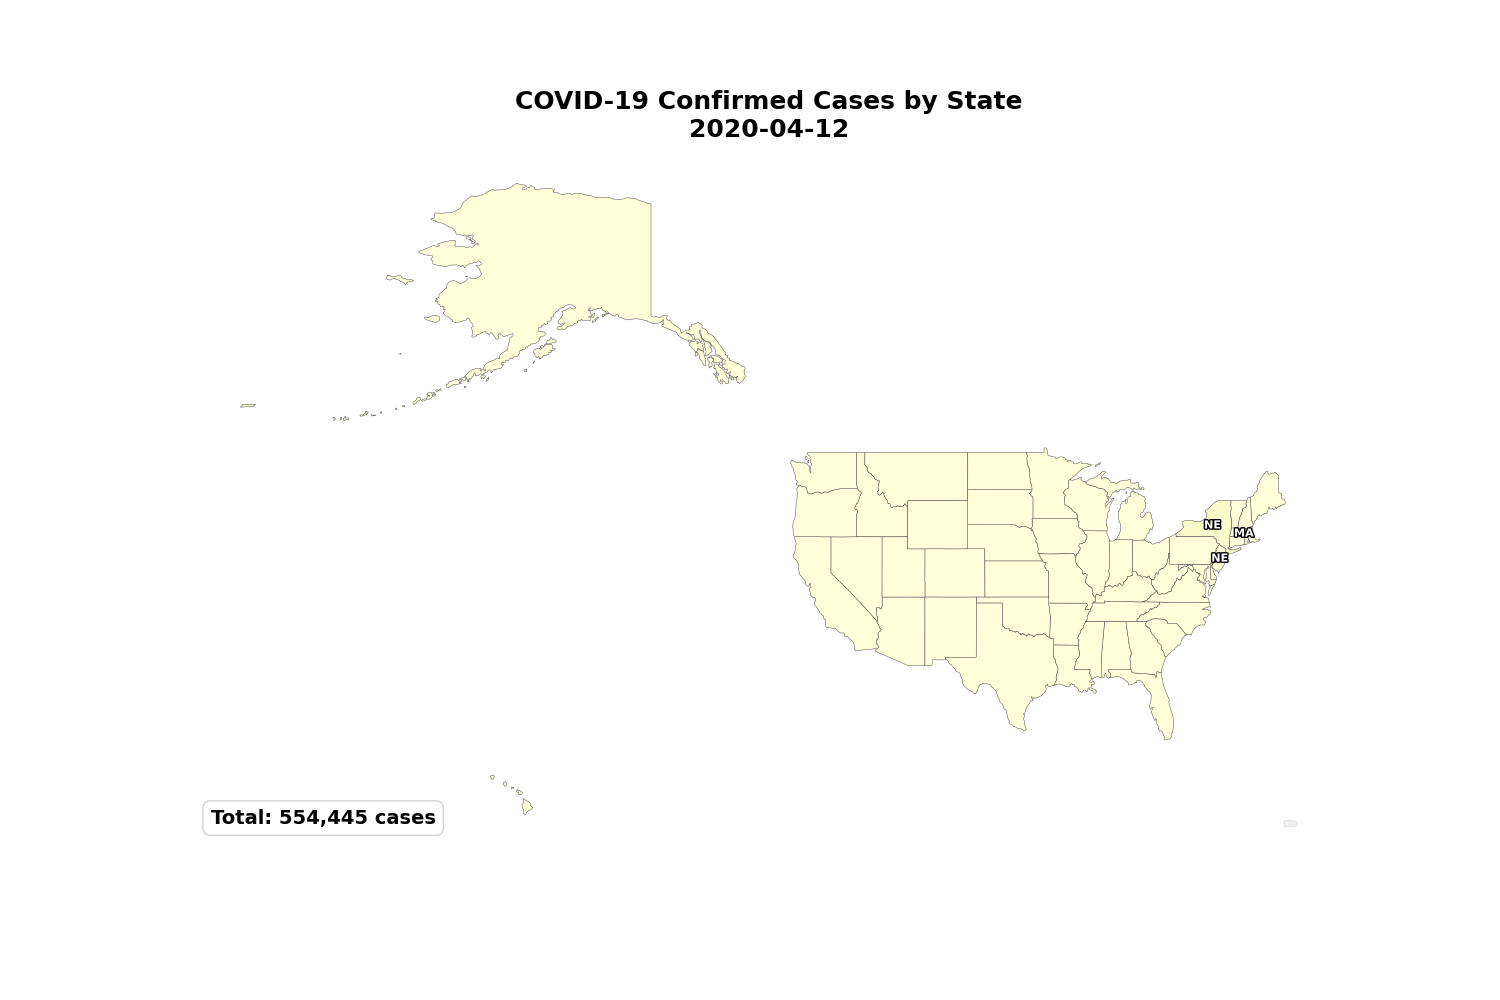

In [29]:
# DISPLAY THE GIF
from IPython.display import Image, display
display(Image(filename='covid_spread_map.gif'))